<a href="https://colab.research.google.com/github/dphummel/AI/blob/main/Is_it_a_dog%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *  #Needed for ImageClassiferCleaner

In [ ]:
path = untar_data(URLs.PETS)/'images'
print(path)

fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

/root/.fastai/data/oxford-iiit-pet/images


(#0) []

In [ ]:
# The input to this function is a string - the name of the file.
def is_cat(x):
    if (x[0].isupper()):
        return "Cat"
    else:
        return "Dog"

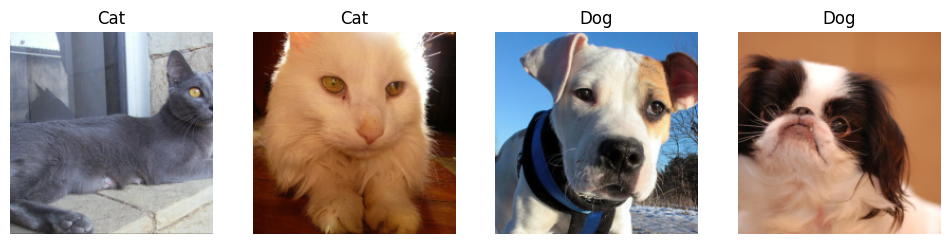

In [ ]:
# Why is a string passed to is_cat function vs. a Path
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.3MB/s]


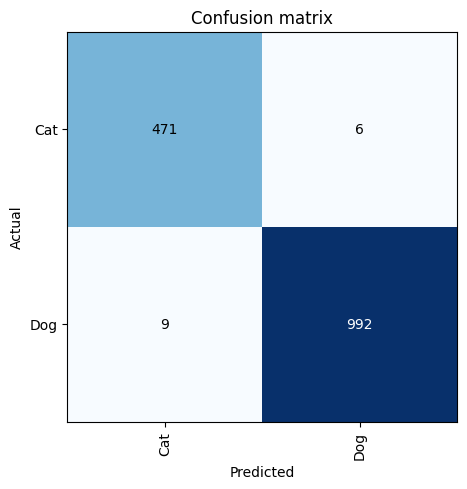

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')

In [ ]:
!ls

model.pkl  sample_data
